In [4]:
#Importing modules
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [5]:
#The data was pre-processed in previous tasks, the EDA was performed in task 2.
#AS a result of previous pre-processing some of the attributes had been eliminated 
#resulting in a simplified dataset which is the start point if this analysis
#This task will be focused in the classification problem

In [6]:
#data
credit1 = pd.read_csv('credit1.csv')
credit1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,0


In [7]:
print (credit1.shape)

(27891, 18)


In [8]:
print(credit1['Default'].unique())

[1 0]


In [11]:
#The dependent variable values can be 0=No Default, 1=Default

In [12]:
print(credit1.groupby('Default').size())

Default
0    21539
1     6352
dtype: int64


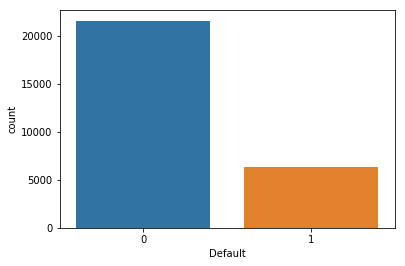

In [13]:
import seaborn as sns
sns.countplot(credit1['Default'],label="Count")
plt.show()

In [14]:
#Performing box plot for each variable to get a better idea of the variables distribution

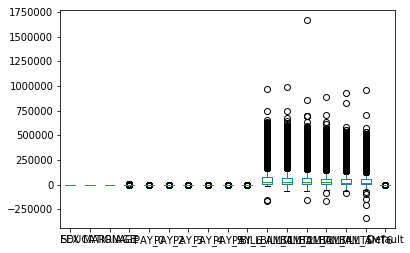

In [16]:
credit1.drop('LIMIT_BAL', axis=1).plot(kind='box')
plt.savefig('credit1_box')
plt.show()

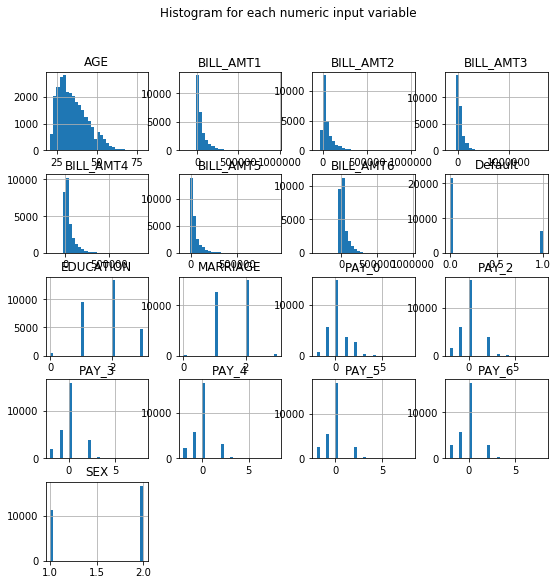

In [18]:
#Histograms may give a better indication of variables distribution
import pylab as pl
credit1.drop('LIMIT_BAL' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('credit1_hist')
plt.show()

In [19]:
#None of the variables seem to have a normal distribution.  However some of the varaibles seem to correlate

In [20]:
#As the attributes dont have the same scale, scaling will need to be applied

In [23]:
y = credit1['Default']
X = credit1.drop(['Default'], axis = 1)

In [24]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Default, dtype: int64

In [25]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131


In [26]:
credit1.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,Default
count,27891.000000,27891.000000,27891.000000,27891.000000,27891.000000,27891.000000,27891.000000,27891.000000,27891.000000,27891.000000,27891.000000,27891.000000,27891.000000,2.789100e+04,27891.000000,27891.000000,27891.000000,27891.000000
mean,161114.685024,1.597720,1.795669,1.556273,35.357606,0.133269,0.007350,-0.027536,-0.086121,-0.135097,-0.161880,54536.204475,52401.544082,5.011033e+04,46098.925818,42975.374386,41443.915098,0.227744
std,127851.517469,0.490367,0.725218,0.522167,9.246990,1.019066,1.121764,1.125742,1.101242,1.066168,1.088552,74997.415303,72559.466691,7.076654e+04,65633.082966,62102.325581,60854.738552,0.419384
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5277.000000,4674.000000,4.251000e+03,3694.500000,2841.500000,2054.000000,0.000000
50%,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26487.000000,25523.000000,2.377200e+04,20706.000000,19546.000000,19030.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71970.000000,69056.500000,6.553750e+04,59177.500000,54515.000000,52086.500000,0.000000
max,1000000.000000,2.000000,3.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,1.000000


In [27]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape
X_test.shape

(8368, 17)

In [28]:
#BUILDING and TUNING MODELS 

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l1', random_state=123)
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
#Adjustment of penalty doesn't have any effect in results, in fact the accuracy is exactly the same as it was.

/Users/elizabeth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.80


In [30]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 15, max_features="sqrt",max_depth=9,random_state = 123).fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.85
Accuracy of RF classifier on test set: 0.81


In [31]:
#SVM
from sklearn.svm import SVC
svm = SVC(C=1,gamma=1,random_state = 123)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.81


In [33]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto')
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.77


In [34]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.81
Accuracy of LDA classifier on test set: 0.80


In [35]:
from sklearn.model_selection import cross_val_score

In [37]:
print(cross_val_score(logreg,X_train,y_train))

/Users/elizabeth/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/elizabeth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/elizabeth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/elizabeth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.80719004 0.81742739 0.81143384]


In [38]:
print(cross_val_score(rf,X_train,y_train))

/Users/elizabeth/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81732985 0.8197326  0.81558322]


In [40]:
print(cross_val_score(svm,X_train,y_train))

/Users/elizabeth/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81425718 0.81742739 0.81327801]


In [41]:
print(cross_val_score(knn,X_train,y_train))

/Users/elizabeth/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.7835305  0.78054403 0.77193791]


In [42]:
print(cross_val_score(lda,X_train,y_train))

[0.80964818 0.81834947 0.81420009]


/Users/elizabeth/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [43]:
#The Random Forest model has the highest scores, other calculations will be performed for furhter validation

In [44]:
rf.score(X_train,y_train)

0.8472058597551606

In [45]:
outcome = []
model_names = []
models = [('RF', RandomForestClassifier(n_estimators = 15, max_features="sqrt",max_depth=9,random_state = 123)), 
          ('SVM', SVC(C=1,gamma=1,random_state = 123)), 
          ('KNN', KNeighborsClassifier(n_neighbors=3, algorithm='auto'))]

In [46]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
random_seed =123
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X, y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

RF| Mean=0.815389 STD=0.015576
SVM| Mean=0.772113 STD=0.014654
KNN| Mean=0.722814 STD=0.012645


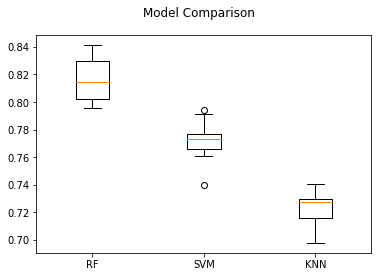

In [49]:
#Review Model results by comparing them in a single chart
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

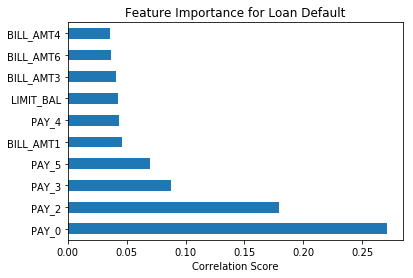

In [50]:
#Reviweing variables importance for the Random Forest as the selected model 
#Checking most important features
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Correlation Score")
plt.title("Feature Importance for Loan Default")
plt.show()

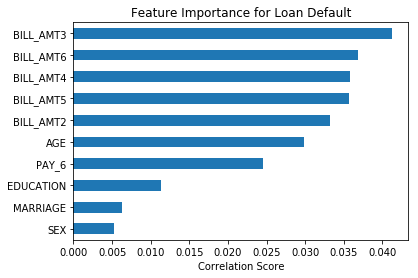

In [51]:
#Reviweing variables importance for the Random Forest as the selected model 
#Checking least important features
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nsmallest(10).plot(kind='barh')
plt.xlabel("Correlation Score")
plt.title("Feature Importance for Loan Default")
plt.show()

In [52]:
#Historical credit seems to be the most important variable to determine default
#At the begining of the analysis, the idea of demographics affecting default was
#considered, however the model analysis shows that has very small influence.

In [53]:
#MAKING PREDICTIONS
#Confusion matrix to verify model results
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = rf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[6020  377]
 [1225  746]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6397
           1       0.66      0.38      0.48      1971

    accuracy                           0.81      8368
   macro avg       0.75      0.66      0.68      8368
weighted avg       0.79      0.81      0.79      8368



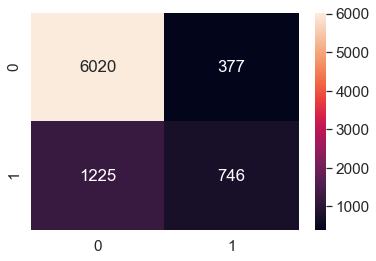

In [65]:
array = [[6020,377],
     [1225,746]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,fmt='d')# font size